# Page view time-series visualizer

![separator](img/sep.jpeg)

For this project we visualize time series data using a line chart, bar chart, and box plots to understand the patterns in visits and identify yearly and monthly growth.

We use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03:

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## 1) Reading and cleaning the data:

We mport the data from "fcc-forum-pageviews.csv" and set the index to the "date" column:

In [140]:
df = pd.read_csv('files/forum-pageviews.csv', 
                 header = 0,
                 names=['Date', 'Views'],
                 parse_dates=['Date'], 
                 index_col='Date')
df.head()

,Views
Date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


We filter out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [149]:
mask = (df['Views'] >= df['Views'].quantile(0.025)) & (df['Views'] <= df['Views'].quantile(0.975))
df_cln = df[mask]
df_cln.head()

,Views
Date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


## 2) Plotting results:

### 1- Daily views line plot:
We draw a line chart representing daily page views on the freeCodeCamp Forum from May 2016 to December 2019:

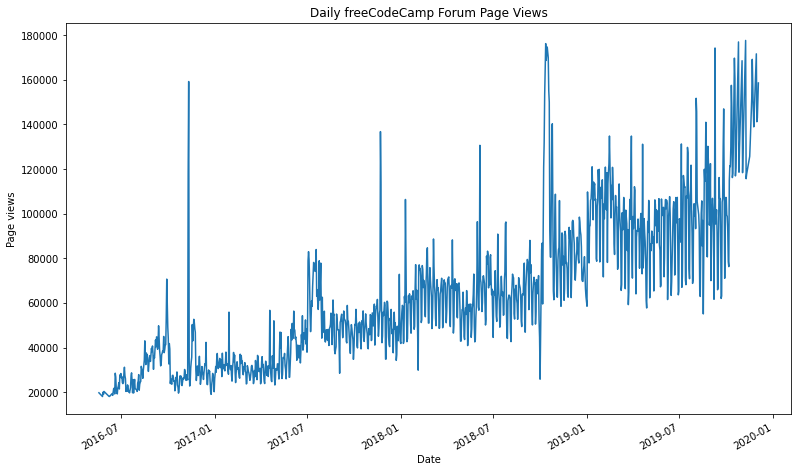

In [328]:
fig, ax = plt.subplots(figsize=(13,8))
df_cln.plot(
    kind = 'line', 
    title = 'Daily freeCodeCamp Forum Page Views',
    xlabel = 'Date',
    ylabel = 'Page views',
    legend = False,
    ax=ax
    )

plt.show(fig)

### 2- Monthly bar plot:

We copy and modify data for monthly bar plot:

In [265]:
df_bar = df_cln.copy()
df_bar['Month'] = df_bar.index.month_name()
df_bar['Year'] = df_bar.index.year
df_bar['month_index'] = df_bar.index.month
df_bar = df_bar.sort_values(by='month_index')

And draw a bar plot using  `Seaborn` that shows the average daily page views for each month grouped by year:

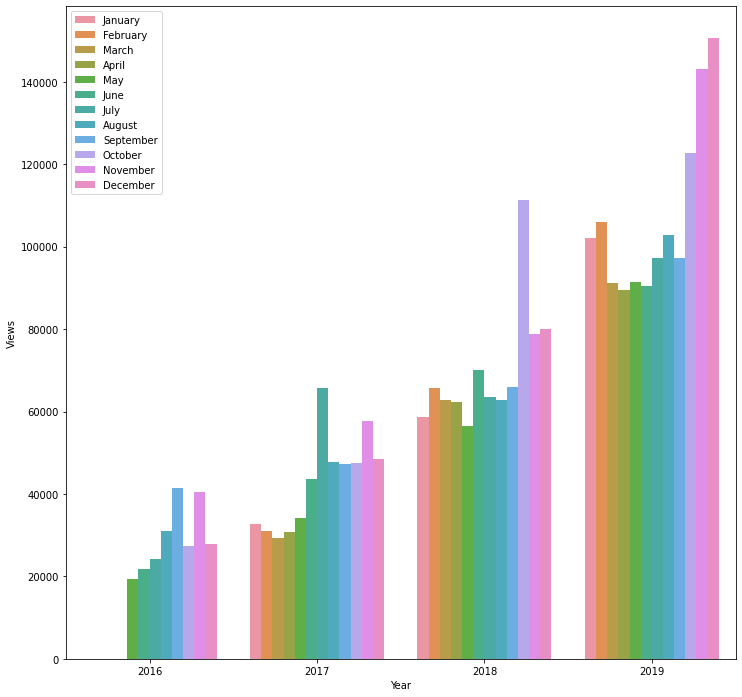

In [329]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(
    data=df_bar, 
    y='Views', 
    x='Year', 
    hue='Month',
    ci=None,
    ax=ax
)
plt.legend(loc='upper left')

plt.show(fig)

### 3- Year/Month-wise box plot:

We first sort and prepare data for box plots:

In [317]:
df_box = df_bar.copy()
df_box['Month'] = df_bar.index.month_name().str.slice(stop=3)

Then, we draw a box plot that shows how the values compare over time and how they are distributed within a given year: 

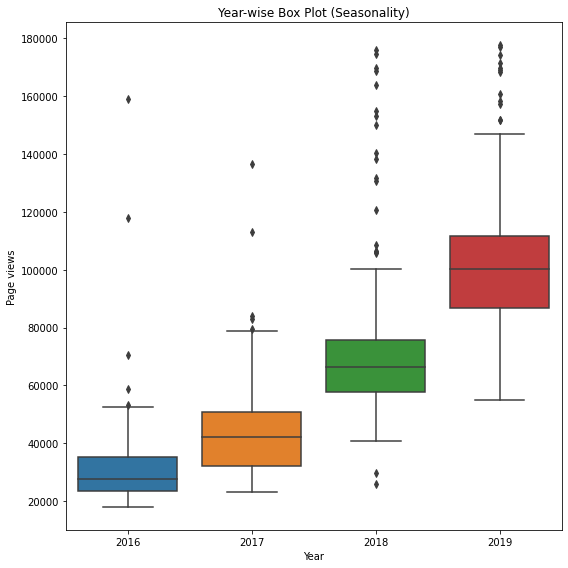

In [319]:
fig1, ax1 = plt.subplots(figsize=(8, 8), tight_layout=True)

sns.boxplot(
    data = df_box,
    x = 'Year', 
    y = 'Views',
    ax=ax1
)

ax1.set_ylabel('Page views')
ax1.set_title('Year-wise Box Plot (Seasonality)')

plt.show(fig1)

or month:

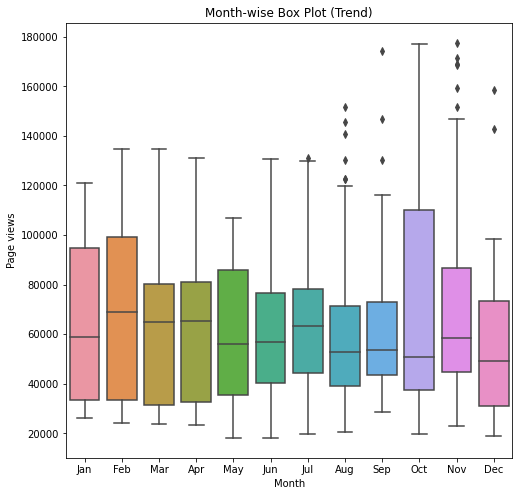

In [320]:
fig2, ax2 = plt.subplots(figsize=(8, 8))
sns.boxplot(
    data = df_box,
    x = 'Month', 
    y = 'Views'
)
ax2.set_ylabel('Page views')
ax2.set_title('Month-wise Box Plot (Trend)')

plt.show(fig2)